<a href="https://colab.research.google.com/github/Afina78/Netology/blob/main/HW__%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


В данных нет пропусков, есть типы категориальные, целочисленные и числа с плавающей точкой.

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Средний возраст выборки 53,5 года,  разброс от 28 лет до 77.

Посмотрим на распределение данных.

In [ ]:
fig = px.pie(df, names='Sex', title='Распределение по гендерным группам')
fig.show()

В наборе данных 79% мужчин и всего 21% женщин. Скорее всего женщины менее подвержены заболеваниям сердца чем мужчины.

In [ ]:
fig = px.pie(df, names='HeartDisease', title='Доля пациентов с  наличием болезни')
fig.show()

Из 918 наблюдений 55,3% пациентов имеют заболевания сердца. В принципе можно считать целевую переменную уравновешенной.

In [ ]:
fig = px.histogram(df , x = 'Age' , color = 'HeartDisease' , marginal = 'box')
fig.show()

начиная с 30 лет наблюдаются болезни сердца, так же имеются выбросы  на отметках 30, 32, 33 и 34 года.

In [ ]:
fig = px.histogram (df , x = 'HeartDisease' , category_orders = dict ( day = ['0', '1']),color = 'Sex',
                    marginal = 'rug', title='Распределение наличия болезни по гендеру', barmode='overlay')
fig.show()

Наличие болезни сердца наблюдается у 458 мужчин, что составляет 90,2% и всего 9,8% женщин

Построим корреляционную матрицу и посмотрим на зависимости признаков.

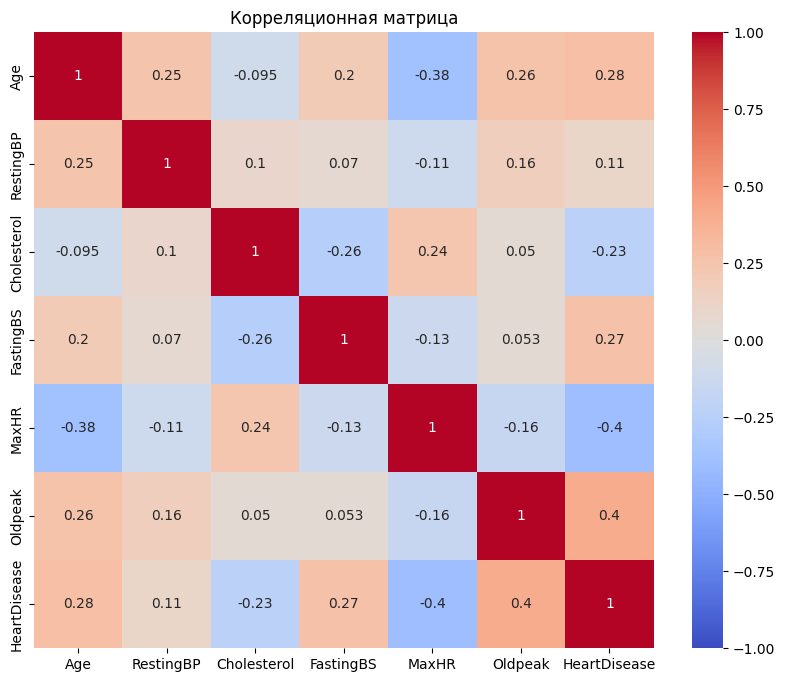

In [ ]:
corr_matrix = numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()
plt.show()

Целевая переменная HeartDisease:

Oldpeak (0.4): Имеет наибольшую положительную корреляцию с HeartDisease, что означает, что по мере увеличения значения Oldpeak вероятность наличия сердечного заболевания увеличивается.

MaxHR (-0.4): Имеет наибольшую отрицательную корреляцию с HeartDisease, указывая на то, что увеличение максимальной частоты сердечных сокращений связано с меньшей вероятностью сердечного заболевания.

Age (0.28) и FastingBS (0.27): Показатели имеют умеренную положительную корреляцию с HeartDisease, что может указывать на тенденцию увеличения риска сердечных заболеваний с возрастом и уровнем сахара в крови натощак.

RestingBP (0.11) и Cholesterol (-0.23): Слабая корреляция, что означает, что влияние этих переменных на вероятность сердечных заболеваний незначительно.

Другие взаимосвязи между признаками:

Age и MaxHR (-0.38): Умеренная отрицательная корреляция, что может указывать на снижение максимальной частоты сердечных сокращений с возрастом.

Age и Oldpeak (0.26): Положительная корреляция, что может означать, что с возрастом увеличивается показатель Oldpeak.

Cholesterol и FastingBS (-0.26): Слабая отрицательная корреляция между уровнем холестерина и сахара в крови натощак.

Взаимосвязи между другими признаками в основном слабы и незначительны.

In [ ]:
# Определение признаков и целевой переменной
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
# Определение колонок для One-Hot Encoding и масштабирования
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Создание конвейера (pipeline) с предобработкой и моделью
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5))
])

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline.fit(X_train, y_train)

# Предсказание на тестовом множестве
y_pred = pipeline.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')
print('Отчет о классификации:')
print(classification_report(y_test, y_pred))
print('Матрица ошибок:')
print(confusion_matrix(y_test, y_pred))

Точность модели: 0.86
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184

Матрица ошибок:
[[67 10]
 [15 92]]


В целом дерево классификации показало хороший результат:
Точность модели составила 86%. Precision чуть лучше на 1 т.е. предсказания наличия заболевания, что немаловажно. Полнота (как часто модель предсказывает правильное значение) чуть лучше на 0 классе. F1 говорит о том, что модель так же лучше справляется с положительно верными предсказаниями на 1 классе.  При сравнении показателей  среднего при учете пропорции в данных и без нее так же чуть лучше точность при учете пропорций, остальные метрики одинаковые. т.е. незначительный дисбаланс особо не влияет на качество модели.

Матрица ошибок:
92 (Правильно предсказанные случаи класса 1).
67 (Правильно предсказанные случаи класса 0).
10 (Случаи класса 0, предсказанные как 1).
15 (Случаи класса 1, предсказанные как 0).

Ложноположительные (FP) случаи (10) меньше, чем ложноотрицательные (FN) случаи (15), что говорит о том, что модель чаще ошибается, когда предсказывает отсутствие заболевания (пропускает случаи заболевания), что является существенным в медицине.


Построим модель классификатор случайный лес и сравним результаты с первой моделью.

In [ ]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5))
])

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline_rf.fit(X1_train, y1_train)

# Предсказание на тестовом множестве
y1_pred = pipeline_rf.predict(X1_test)

# Оценка качества модели
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Точность модели: {accuracy:.2f}')
print('Отчет о классификации:')
print(classification_report(y1_test, y1_pred))
print('Матрица ошибок:')
print(confusion_matrix(y1_test, y1_pred))

Точность модели: 0.86
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Матрица ошибок:
[[66 11]
 [15 92]]


Случайный лес при тех же параметрах что и дерево решений дает чуть хуже результаты.

Построим диаграммы важности признаков по первой и второй модели.

<ipython-input-18-82961787453f>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




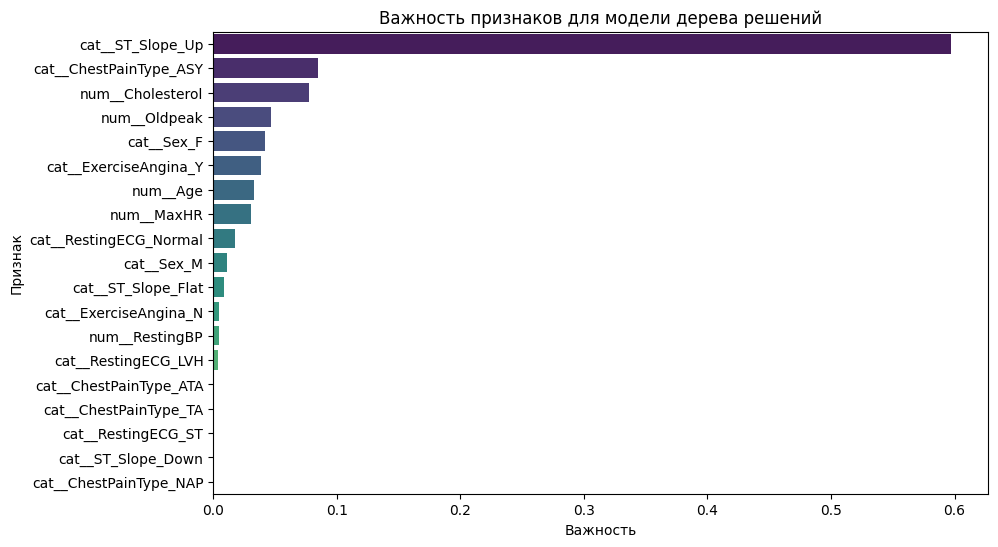

In [ ]:
# Извлечение модели дерева решений из pipeline
model = pipeline.named_steps['classifier']

# Извлечение важности признаков
importances = model.feature_importances_

# Получение списка всех признаков после предобработки
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Создание DataFrame для визуализации
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Сортировка признаков по важности
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Важность признаков для модели дерева решений')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

<ipython-input-19-a90350fc1c70>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




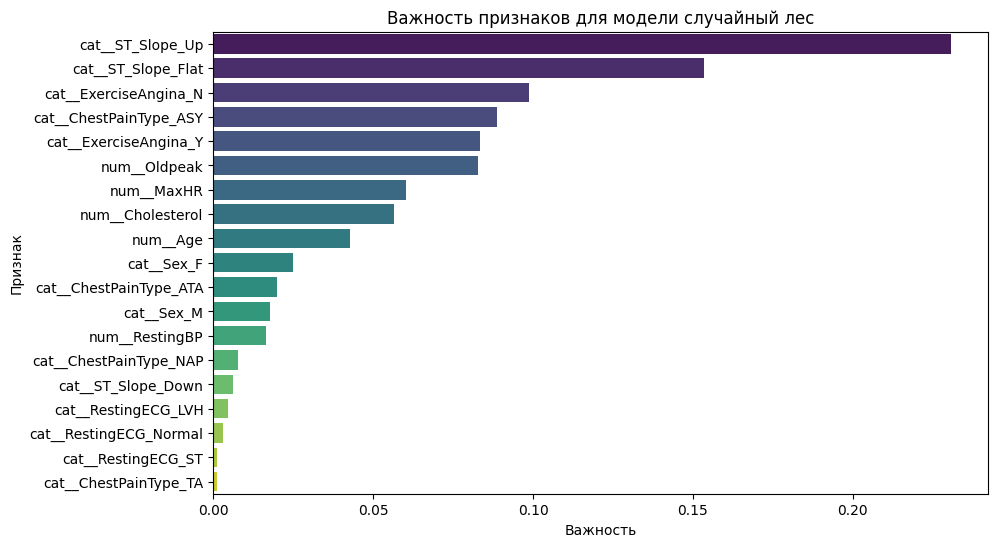

In [ ]:
# Извлечение модели случайный лес из pipeline
model_rf = pipeline_rf.named_steps['classifier']

# Извлечение важности признаков
importances_rf = model_rf.feature_importances_

# Получение списка всех признаков после предобработки
feature_names_rf = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# Создание DataFrame для визуализации
feature_importances_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf})

# Сортировка признаков по важности
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')
plt.title('Важность признаков для модели случайный лес')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

По расстановке важности признаков по графикам видно что модели присваивают разным признакам разную важность, кроме ST_Slope_UP, он является лидирующим у обеих моделей.

Применим Bagging  к модели DecisionTreeClassifier

In [ ]:
# Функция для преобразования массива в DataFrame
def to_dataframe(X):
    return pd.DataFrame(X, columns=df.drop('HeartDisease', axis=1).columns)

# Создание трансформера для предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Создание pipeline с предобработкой и моделью дерева решений
pipeline = Pipeline(steps=[
    ('to_df', FunctionTransformer(to_dataframe)),  # Преобразование в DataFrame
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Разделение данных на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Использование pipeline в BaggingClassifier
bagging = BaggingClassifier(estimator=pipeline,
                            n_estimators=100,  # Количество деревьев в ансамбле
                            max_samples=0.8,   # Доля выборки для каждого дерева
                            max_features=1.0,  # Доля признаков для каждого дерева
                            bootstrap=True,    # Использование бутстрап-выборок
                            random_state=42)

# Обучение BaggingClassifier
bagging.fit(X2_train, y2_train)

# Предсказание на тестовом множестве
y_pred_b = bagging.predict(X2_test)

# Оценка качества модели
print('Отчет о классификации:')
print(classification_report(y2_test, y_pred_b))
print('Матрица ошибок:')
print(confusion_matrix(y2_test, y_pred_b))

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Матрица ошибок:
[[69  8]
 [16 91]]


Тчоность мета модели намного лучше по сравнению с деревом решений

In [ ]:
# Создание отчетов о классификации
report_tree = classification_report(y_test, y_pred, output_dict=True)
report_bagging = classification_report(y2_test, y_pred_b, output_dict=True)

# Печать отчетов о классификации
print("Отчет о классификации для Decision Tree:")
print(pd.DataFrame(report_tree).transpose())

print("\nОтчет о классификации для Bagging:")
print(pd.DataFrame(report_bagging).transpose())

Отчет о классификации для Decision Tree:
              precision    recall  f1-score     support
0              0.752809  0.870130  0.807229   77.000000
1              0.894737  0.794393  0.841584  107.000000
accuracy       0.826087  0.826087  0.826087    0.826087
macro avg      0.823773  0.832261  0.824407  184.000000
weighted avg   0.835343  0.826087  0.827207  184.000000

Отчет о классификации для Bagging:
              precision    recall  f1-score     support
0              0.811765  0.896104  0.851852   77.000000
1              0.919192  0.850467  0.883495  107.000000
accuracy       0.869565  0.869565  0.869565    0.869565
macro avg      0.865478  0.873286  0.867673  184.000000
weighted avg   0.874236  0.869565  0.870253  184.000000


Обучим стекинг трех моделей:

tree.DecisionTreeClassifier,

ensemble.RandomForestClassifier и

svm.LinearSVC

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение базовых моделей для стекинга
estimators = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('linear_svc', LinearSVC(max_iter=10000, random_state=42, dual=False))
]

# Создание стекинг-классификатора с логистической регрессией в качестве мета-классификатора
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Создание конвейера (pipeline) с предобработкой и стекинг-классификатором
pipeline = Pipeline(steps=[
    ('to_df', FunctionTransformer(to_dataframe)),  # Преобразование в DataFrame
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

# Обучение стекинг-классификатора
pipeline.fit(X3_train, y3_train)

# Предсказание на тестовом множестве
y_pred_st = pipeline.predict(X3_test)

# Печать отчета о классификации и матрицы ошибок
print('Отчет о классификации для стекинг-классификатора:')
print(classification_report(y3_test, y_pred_st))
print('Матрица ошибок для стекинг-классификатора:')
print(confusion_matrix(y3_test, y_pred_st))

Отчет о классификации для стекинг-классификатора:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Матрица ошибок для стекинг-классификатора:
[[67 10]
 [16 91]]


In [ ]:
report_stacking = classification_report(y3_test, y_pred_st, output_dict=True)
print("\nОтчет о классификации для Bagging:")
print(pd.DataFrame(report_bagging).transpose())

print("\nОтчет о классификации для Stacking:")
print(pd.DataFrame(report_stacking).transpose())


Отчет о классификации для Bagging:
              precision    recall  f1-score     support
0              0.811765  0.896104  0.851852   77.000000
1              0.919192  0.850467  0.883495  107.000000
accuracy       0.869565  0.869565  0.869565    0.869565
macro avg      0.865478  0.873286  0.867673  184.000000
weighted avg   0.874236  0.869565  0.870253  184.000000

Отчет о классификации для Stacking:
              precision    recall  f1-score     support
0              0.807229  0.870130  0.837500   77.000000
1              0.900990  0.850467  0.875000  107.000000
accuracy       0.858696  0.858696  0.858696    0.858696
macro avg      0.854110  0.860299  0.856250  184.000000
weighted avg   0.861753  0.858696  0.859307  184.000000


Bagging справился чуть лучше по предсказаниям чем Stacking.

В итоге наиболее успешная модель на мой взгляд это Bagging т.к. доля правильныйх предсказаний у нее самая высокая 87%, чем у Stacking - 86%

По матрице ошибок у Bagging так же на 2 случая больше правильных предсказаний класса 0 (собственно которые и дают скорее всего +1% к точности), по классу 1 предсказания идентичные.

